In [1]:
import matplotlib.pyplot as plt
import numpy as np
import vector
import awkward as ak
import glob
from math import pi

In [2]:
def build_p4(data, ref):
  return vector.awk(
    ak.zip({
        "px": data[ref].x,
        "py": data[ref].y,
        "pz": data[ref].z,
        "mass": data[ref].tau
        
    })
    )

In [3]:
data = []
data_qcd = []
for f in glob.glob('/local/snandan/grid_withmorevar/Grid/ZH_Htautau/*parquet')[:150]:
    data.append(ak.Array(ak.from_parquet(f).tolist()))
for f in glob.glob('/local/snandan/grid_withmorevar/Grid/QCD/*parquet')[:150]:
    data_qcd.append(ak.Array((ak.from_parquet(f).tolist())))
data = ak.concatenate(data)
data_qcd = ak.concatenate(data_qcd)
print('data loaded')

data loaded


In [12]:
inner = data['inner_grid'].to_numpy()
inner_qcd = data_qcd['inner_grid'].to_numpy()

In [13]:
tau_p4=build_p4(data,'tau_p4s')
mask_pt = tau_p4.pt > 20
mask_cone = abs(90 - (np.rad2deg(tau_p4.theta)-90)) >45
mask = mask_pt * mask_cone

In [14]:
tau_p4_qcd=build_p4(data_qcd,'tau_p4s')
mask_pt_qcd = tau_p4_qcd.pt > 20
mask_cone_qcd = abs(90 - (np.rad2deg(tau_p4_qcd.theta)-90)) >45
mask_qcd = mask_pt_qcd * mask_cone_qcd

True


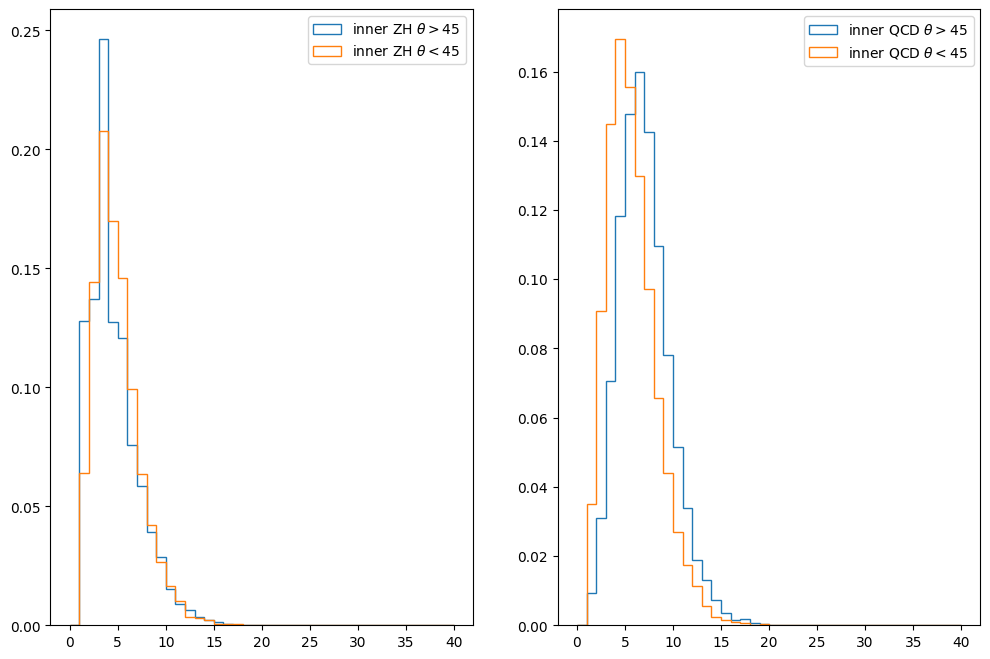

In [74]:
mul_br_zh = np.sum(np.sum(inner[mask,14:19,:,:], axis=(2,3))+np.sum(inner[mask,33:38,:,:], axis=(2,3)),axis=1)
#print((inner[mask][175][0]))
mul_en_zh = np.sum(np.sum(inner[~mask,14:19,:,:], axis=(2,3))+np.sum(inner[~mask,33:38,:,:], axis=(2,3)),axis=1)
mul_br_qcd = np.sum(np.sum(inner_qcd[mask_qcd,14:19,:,:], axis=(2,3))+np.sum(inner_qcd[mask_qcd,33:38,:,:], axis=(2,3)),axis=1)
mul_en_qcd = np.sum(np.sum(inner_qcd[~mask_qcd,14:19,:,:], axis=(2,3))+np.sum(inner_qcd[~mask_qcd,33:38,:,:], axis=(2,3)),axis=1)

fig, axs0 = plt.subplots(1,2, figsize=(3*4,2*4))

plt.sca(axs0[0])
a,b,c=plt.hist(mul_br_zh[mul_br_zh!=0],bins=40, range=(0,40), histtype='step',label=r'inner ZH $\theta>45$', density=True)
a,b,c=plt.hist(mul_en_zh[mul_en_zh!=0],bins=40, range=(0,40), histtype='step', label=r'inner ZH $\theta<45$', density=True)
plt.legend()

plt.sca(axs0[1])
a,b,c=plt.hist(mul_br_qcd[mul_br_qcd!=0],bins=40, range=(0,40), histtype='step', label=r'inner QCD $\theta>45$', density=True)
a,b,c=plt.hist(mul_en_qcd[mul_en_qcd!=0],bins=40, range=(0,40), histtype='step', label=r'inner QCD $\theta<45$', density=True)
plt.legend()

print(mul_br_zh[71]==0)

In [64]:
print(f'particle multiplicity zero for {ak.sum((mul_br_zh==0))} entries for ZH in barrel and inner grid')
print(f'particle multiplicity zero for {ak.sum((mul_en_zh==0))} entries for ZH in endcap and inner grid')
print(f'particle multiplicity zero for {ak.sum((mul_br_qcd==0))} entries for QCD in barrel and inner grid')
print(f'particle multiplicity zero for {ak.sum((mul_en_zh==0))} entries for QCD in barrel and inner grid')
print(' for zero multiplicities there is no electron, muon, charged hadron, neutral hadron and gamma. Only one particle (what is the pdgid?)')

particle multiplicity zero for 679 entries for ZH in barrel and inner grid
particle multiplicity zero for 2061 entries for ZH in endcap and inner grid
particle multiplicity zero for 0 entries for QCD in barrel and inner grid
particle multiplicity zero for 2061 entries for QCD in barrel and inner grid
 for zero multiplicities there is no electron, muon, charged hadron, neutral hadron and gamma. Only one particle (what is the pdgid?)


In [49]:
outer = data['outer_grid'].to_numpy()
outer_qcd = data_qcd['outer_grid'].to_numpy()

True

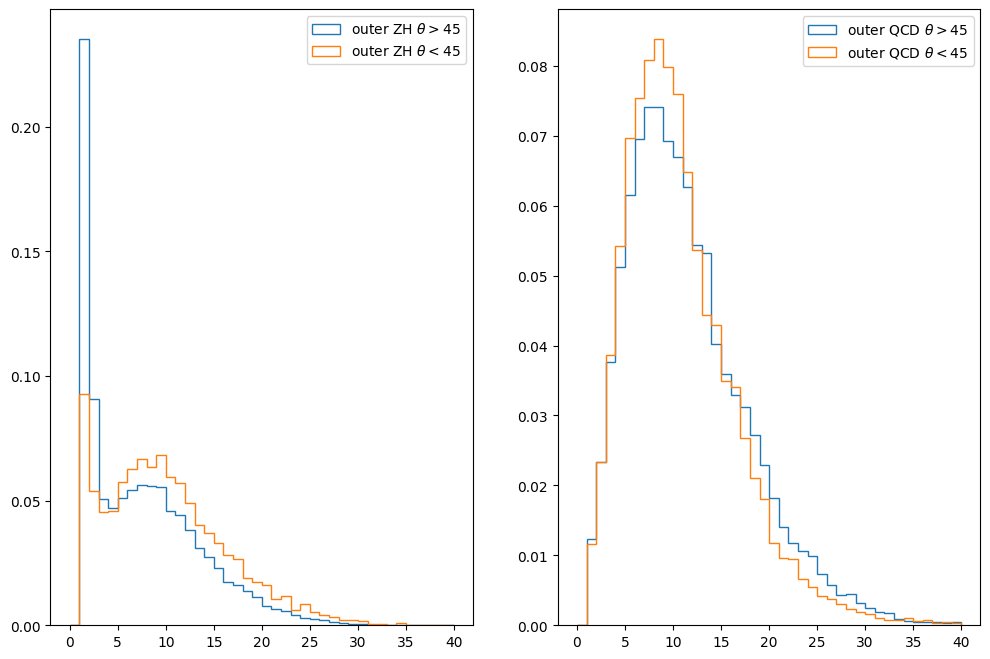

In [73]:
mul_br_zh = np.sum(np.sum(outer[mask,14:19,:,:], axis=(2,3))+np.sum(outer[mask,33:38,:,:], axis=(2,3)),axis=1)
mul_en_zh = np.sum(np.sum(outer[~mask,14:19,:,:], axis=(2,3))+np.sum(outer[~mask,33:38,:,:], axis=(2,3)),axis=1)
mul_br_qcd = np.sum(np.sum(outer_qcd[mask_qcd,14:19,:,:], axis=(2,3))+np.sum(outer_qcd[mask_qcd,33:38,:,:], axis=(2,3)),axis=1)
mul_en_qcd = np.sum(np.sum(outer_qcd[~mask_qcd,14:19,:,:], axis=(2,3))+np.sum(outer_qcd[~mask_qcd,33:38,:,:], axis=(2,3)),axis=1)

fig, axs0 = plt.subplots(1,2, figsize=(3*4,2*4))

plt.sca(axs0[0])
a,b,c=plt.hist(mul_br_zh[mul_br_zh!=0],bins=40, range=(0,40), histtype='step',label=r'outer ZH $\theta>45$', density=True)
a,b,c=plt.hist(mul_en_zh[mul_en_zh!=0],bins=40, range=(0,40), histtype='step', label=r'outer ZH $\theta<45$', density=True)
plt.legend()

plt.sca(axs0[1])
a,b,c=plt.hist(mul_br_qcd[mul_br_qcd!=0],bins=40, range=(0,40), histtype='step', label=r'outer QCD $\theta>45$', density=True)
a,b,c=plt.hist(mul_en_qcd[mul_en_qcd!=0],bins=40, range=(0,40), histtype='step', label=r'outer QCD $\theta<45$', density=True)
plt.legend()

(mul_br_zh[71]==0)


In [68]:
print(f'particle multiplicity zero for {ak.sum((mul_br_zh==0))} entries for ZH in barrel and inner grid')
print(f'particle multiplicity zero for {ak.sum((mul_en_zh==0))} entries for ZH in endcap and inner grid')
print(f'particle multiplicity zero for {ak.sum((mul_br_qcd==0))} entries for QCD in barrel and inner grid')
print(f'particle multiplicity zero for {ak.sum((mul_en_zh==0))} entries for QCD in barrel and inner grid')
print(' for zero multiplicities there is no electron, muon, charged hadron, neutral hadron and gamma.')

particle multiplicity zero for 10066 entries for ZH in barrel and inner grid
particle multiplicity zero for 3246 entries for ZH in endcap and inner grid
particle multiplicity zero for 60 entries for QCD in barrel and inner grid
particle multiplicity zero for 3246 entries for QCD in barrel and inner grid
 for zero multiplicities there is no electron, muon, charged hadron, neutral hadron and gamma.


In [63]:
print(f'unique pdgid in data {np.unique(ak.flatten(data.event_reco_cand_pdg))}')


unique pdgid in data [-13, -11, 11, 13, 22, 130, 211]
